# Initialize

This time around we use larger dataset. See WaveletTest.ipynb for the previous experiment.

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
# First, load the data
with open('temphum2.txt') as f:
    text = f.readlines()

In [5]:
# split delimited columns into strings 
arr = []
x = []
y1, y2 = [], []
for line in text:
    values = line.split("\t")
    arr.append(values)
    #x.append(datetime.strptime(values[0], '%a %b %d %H:%M:%S %Y').timestamp())
    x.append(datetime.strptime(values[0], '%Y/%m/%d %H:%M:%S').timestamp()) # 2017/03/23 18:29:37
    y1.append(float(values[1]))
    y2.append(float(values[2]))

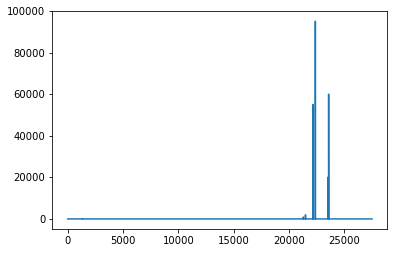

In [6]:
plt.plot(sp.diff(x))

First, let's visualize the time chart to get the gist of the data.

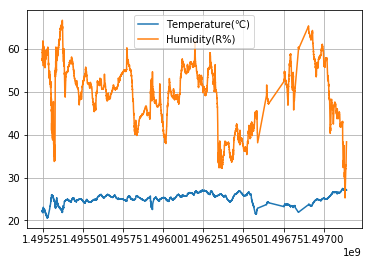

In [7]:
m = np.transpose(np.array([y1,y2]))
plt.plot(x, m)
plt.legend(('Temperature(℃)', 'Humidity(R%)'))
plt.grid()

Then, we can apply wavelet transform to the data.

In [8]:
from scipy import signal
widths = np.arange(1, 151)
w1 = signal.cwt(y1, signal.ricker, widths)
w2 = signal.cwt(y2, signal.ricker, widths)

Let's visualize the result.

We'll plot temperature and humidity into separate plots. Raw readings will be plotted on top of the wavelet images. It's gonna be complex, so embrace yourself:

Min & max:  176.337366692 -28.9273460625
Min & max:  373.657846301 -177.894936032


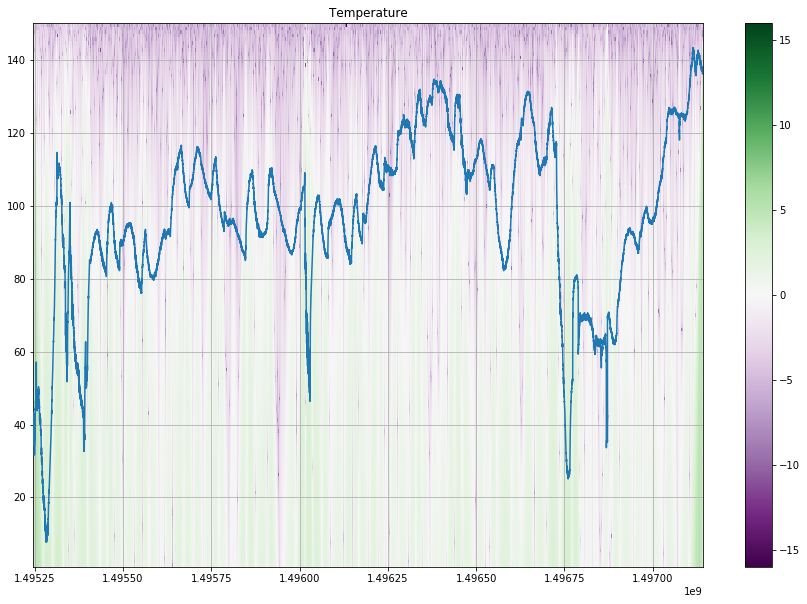

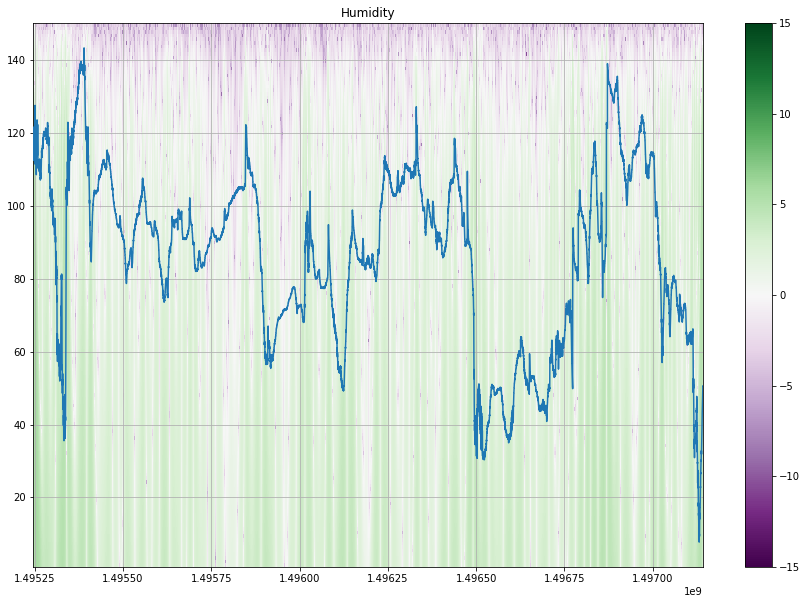

In [10]:
for data in [[y1, w1, 'Temperature'], [y2, w2, 'Humidity']]:
    w = data[1]
    print('Min & max: ', w.max(), w.min())
    logw = np.log(abs(w))
    #logw = w
    fig, axs = plt.subplots(1,1,figsize=(15,10))

    im = axs.imshow(logw, extent=[min(x), max(x), 1, np.shape(logw)[0]], cmap='PRGn', aspect='auto',
            vmax=abs(logw).max(), vmin=-abs(logw).max())
    plt.colorbar(im)
    axs.set_title(data[2])
    axs.grid()

    # Begin overlapped plot
    fig.canvas.draw()

    box = axs._position.bounds
    tmpax = fig.add_axes(box)
    tmpax.set_axis_off()

    tmpax.plot(data[0])
    tmpax.set_xlim(0, len(x))
    
    # Apparently we do not need to show() explicitly if axis.imshow is used.
    #plt.show()